<a href="https://colab.research.google.com/github/atreya221/Project_Submission_ANN_SC/blob/master/Assignment_03/Fashion_MNIST_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x
%matplotlib inline

import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.3.0


In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images,train_labels), (test_images,test_labels) = fashion_mnist.load_data()

In [3]:
print(train_images.shape)
print(test_images.shape)
print(train_labels.shape)
print(test_labels.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [4]:
labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Enter a number: 0


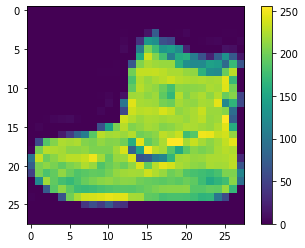

Ankle boot


In [5]:
a = int(input("Enter a number: "))
plt.imshow(train_images[a])
plt.colorbar()
plt.grid(False)
plt.show()
print(labels[train_labels[a]])

In [6]:
train_images = train_images/255.0
test_images = test_images/255.0

We display the first 25 images from the training set and the corresponding class labels.

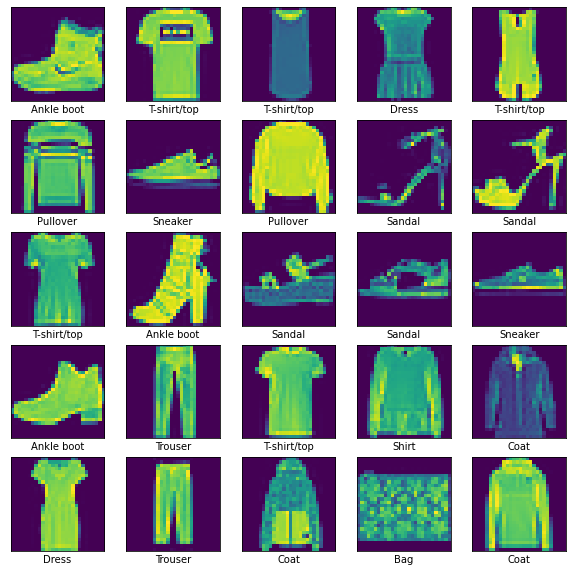

In [7]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(train_images[i])
  plt.xlabel(labels[train_labels[i]])
plt.show()

In [8]:
model = keras.models.Sequential([
  keras.layers.Flatten(input_shape=(28,28)),
  keras.layers.Dense(128,activation='relu'),
  keras.layers.Dense(10,activation='softmax'),
])

In [9]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None


In [10]:
model.compile(optimizer=keras.optimizers.Adam(0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [11]:
model.fit(train_images,train_labels,epochs=30)

Epoch 1/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4937 - accuracy: 0.8266
Epoch 2/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3751 - accuracy: 0.8651
Epoch 3/30
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3361 - accuracy: 0.8777
Epoch 4/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3114 - accuracy: 0.8860
Epoch 5/30
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2938 - accuracy: 0.8923
Epoch 6/30
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2788 - accuracy: 0.8968
Epoch 7/30
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2656 - accuracy: 0.9021
Epoch 8/30
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2532 - accuracy: 0.9055
Epoch 9/30
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2466 - accuracy: 0.9089
Epoch 10/30
1875/1875 [==============================] - 3s 1ms/step - loss: 0.236

In [12]:
test_loss, test_acc = model.evaluate(test_images,test_labels, verbose=2)
print("\nTest accuracy : ", test_acc)

313/313 - 0s - loss: 0.4035 - accuracy: 0.8886

Test accuracy :  0.8885999917984009


In [13]:
predictions = model.predict(test_images)

In [14]:
predictions[0]

array([8.0854546e-15, 8.5371943e-14, 1.9947443e-14, 8.7797169e-17,
       3.1391147e-13, 2.8081530e-07, 1.3560555e-12, 5.6955741e-06,
       3.5621430e-12, 9.9999404e-01], dtype=float32)

In [17]:
np.argmax(predictions[0])

9

Enter any number: 5


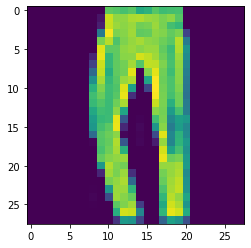

Actual label :  Trouser
Predicted label :  Trouser


In [19]:
a = int(input("Enter any number: "))
plt.imshow(test_images[a])
plt.grid(False)
plt.show()
print("Actual label : ", labels[test_labels[a]])
print("Predicted label : ", labels[np.argmax([predictions[a]])])

In [24]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(labels[predicted_label],
                                100*np.max(predictions_array),
                                labels[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

Enter any number :5


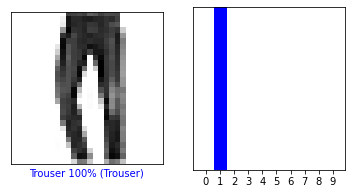

In [30]:
i = int(input("Enter any number :"))
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()